### 기본 데이터 분석

In [1]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf
!apt-get update -qq
!apt-get install fonts-nanum* -qq

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 46 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 39 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

In [2]:
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv('./train.csv',  encoding='cp949')
print(len(df))
df.head()

1537


,연번,상가유형,호선,역명,상가번호,면적(제곱미터),영업업종,계약시작일자,계약종료일자,월임대료,사업진행단계
0,1,개별(일반),1호선,서울(1)역,150-107,33.00,사무실,2019-06-20,2024-06-19,380100.0,NaN
1,2,네트워크,1호선,서울(1)역,150-109,12.00,패션잡화,2023-01-16,2028-05-16,3225582.0,NaN
2,3,개별(일반),1호선,시청(1)역,151-101,29.73,패션잡화,2022-08-02,2027-08-02,3166600.0,NaN
3,4,개별(일반),1호선,시청(1)역,151-103,57.60,기타,2020-02-01,2025-01-31,1858300.0,NaN
4,5,개별(일반),1호선,시청(1)역,151-104,25.00,플라워,2020-12-31,2026-01-30,2470600.0,NaN


In [4]:
df.columns

Index(['연번', '상가유형', '호선', '역명', '상가번호', '면적(제곱미터)', '영업업종', '계약시작일자',
       '계약종료일자', '월임대료', '사업진행단계'],
      dtype='object')

In [5]:
print('연번 : ', df['연번'].isnull().sum())
print('상가유형 : ', df['상가유형'].isnull().sum())
print('호선 : ', df['호선'].isnull().sum())
print('역명 : ', df['역명'].isnull().sum())
print('상가번호 : ', df['상가번호'].isnull().sum())
print('면적 : ', df['면적(제곱미터)'].isnull().sum())
print('영업업종 : ', df['영업업종'].isnull().sum())
print('계약시작일자 : ', df['계약시작일자'].isnull().sum())
print('계약종료일자 : ', df['계약종료일자'].isnull().sum())
print('월임대료 : ', df['월임대료'].isnull().sum())
print('사업진행단계 : ', df['사업진행단계'].isnull().sum())

연번 :  0
상가유형 :  0
호선 :  0
역명 :  0
상가번호 :  0
면적 :  59
영업업종 :  209
계약시작일자 :  210
계약종료일자 :  210
월임대료 :  325
사업진행단계 :  1328


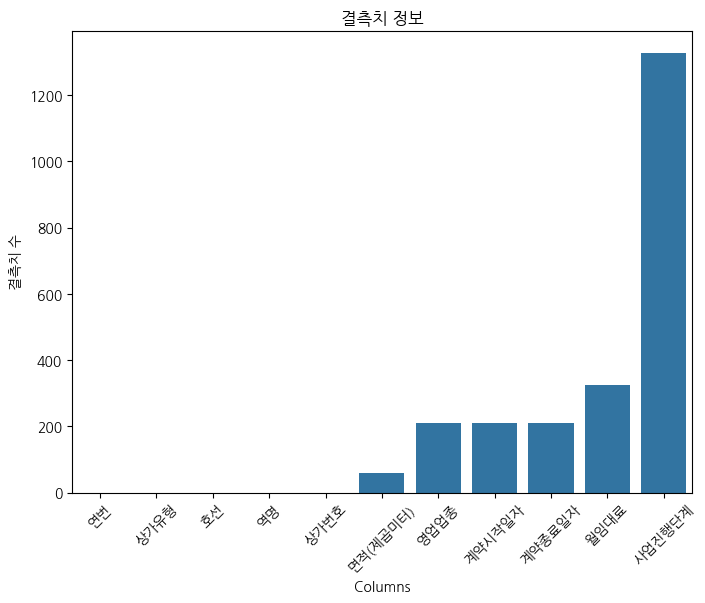

In [43]:
null_counts = df.isnull().sum()
plt.figure(figsize=(8, 6))
sns.barplot(x=null_counts.index, y=null_counts.values)
plt.xticks(rotation=45)
plt.title('결측치 정보')
plt.xlabel('Columns')
plt.ylabel('결측치 수')
plt.show()

### 임대료 가격 범위 확인

In [6]:
df['호선'].unique()

array(['1호선', '2호선', '3호선', '4호선', '5호선', '6호선', '7호선', '8호선'],
      dtype=object)

In [7]:
df['호선'].value_counts()

호선
7호선    360
2호선    294
5호선    286
6호선    181
3호선    179
4호선    146
8호선     64
1호선     27
Name: count, dtype: int64

In [8]:
pd.options.display.float_format = '{:,.0f}'.format
df['월임대료'].describe()

count         1,212
mean      5,227,846
std      10,524,519
min         153,600
25%       1,708,435
50%       3,168,300
75%       5,875,538
max     287,922,774
Name: 월임대료, dtype: float64

- 15만원에서 최고가 2억 8792만까지의 범위로 구성

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import warnings

warnings.filterwarnings(action='ignore')
path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf' # 나눔 고딕
font_name = fm.FontProperties(fname=path, size=10).get_name() # 기본 폰트 사이즈 : 10
plt.rc('font', family=font_name)

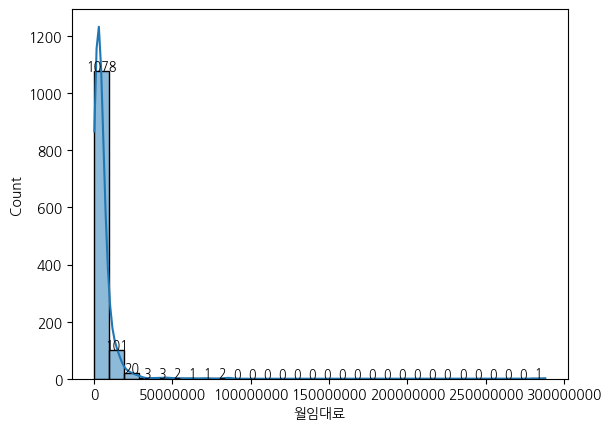

In [37]:
ax = sns.histplot(df['월임대료'], bins=30, kde=True)
plt.ticklabel_format(style='plain', axis='x')

for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 3, height, ha = 'center', size = 9)

plt.show()

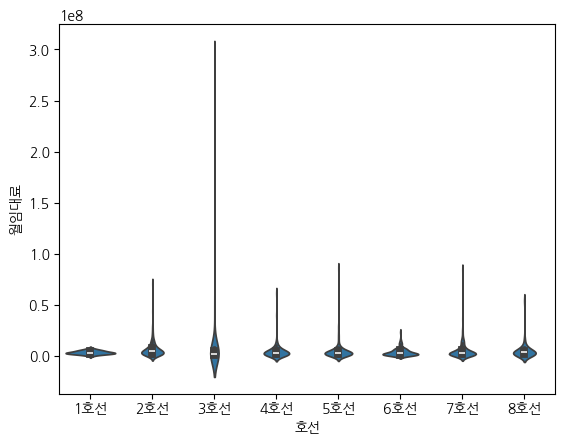

In [11]:
sns.violinplot(x='호선', y='월임대료', data=df)
plt.show()

### 어떠한 역의 임대료가 제일 비싼가?

In [12]:
df['역명'].unique()

array(['서울(1)역', '시청(1)역', '종각역', '종로3가(1)역', '종로5가역', '동대문(1)역',
       '동묘앞(1)역', '을지로입구역', '을지로3가(2)역', '을지로4가(2)역', '동대문역사문화공원(2)역',
       '신당(2)역', '상왕십리역', '왕십리(2)역', '한양대역', '뚝섬역', '성수역', '건대입구(2)역',
       '구의역', '강변역', '잠실나루역', '잠실(2)역', '잠실새내역', '종합운동장역', '선릉역', '역삼역',
       '강남역', '교대(2)역', '서초역', '방배역', '사당(2)역', '낙성대역', '서울대입구역', '봉천역',
       '신림역', '신대방역', '구로디지털단지역', '대림(2)역', '신도림역', '문래역', '영등포구청(2)역',
       '당산역', '합정(2)역', '홍대입구역', '신촌역', '이대역', '아현역', '충정로(2)역', '양천구청역',
       '신정네거리역', '연신내(3)역', '불광(3)역', '녹번역', '홍제역', '경복궁역', '안국역',
       '종로3가(3)역', '을지로3가(3)역', '동대입구역', '약수(3)역', '금호역', '옥수역', '압구정역',
       '신사역', '고속터미널(3)역', '교대(3)역', '양재역', '매봉역', '도곡역', '대청역', '일원역',
       '수서역', '가락시장(3)역', '경찰병원역', '당고개역', '상계역', '노원(4)역', '창동역', '쌍문역',
       '수유역', '미아역', '미아사거리역', '길음역', '성신여대입구역', '혜화역', '동대문(4)역',
       '동대문역사문화공원(4)역', '충무로(4)역', '명동역', '회현역', '숙대입구역', '신용산역', '이촌역',
       '동작역', '총신대입구역', '사당(4)역', '방화역', '개화산역', '김포공항역', '송정역', '발산역',
  

In [13]:
df['역명'].value_counts()

역명
오목교역         46
고속터미널(3)역    39
천호(5)역       27
잠실(8)역       26
사당(4)역       25
             ..
영등포시장역        1
개화산역          1
창신역           1
명동역           1
모란역           1
Name: count, Length: 237, dtype: int64

- 오목교 역에 상가가 제일 많음

In [16]:
df = df.sort_values(by='월임대료', ascending=False)
df.head()

,연번,상가유형,호선,역명,상가번호,면적(제곱미터),영업업종,계약시작일자,계약종료일자,월임대료,사업진행단계
416,417,복합,3호선,고속터미널(3)역,329-111,"7,475",패션잡화,2016-03-15,2026-11-09,"287,922,774",NaN
724,725,복합,5호선,오목교역,521-122,65,플라워,2023-07-03,2028-10-11,"86,110,000",NaN
1371,1372,복합,7호선,고속터미널(7)역,734-214,377,패션잡화,2023-04-10,2028-07-19,"84,900,600",NaN
133,134,복합,2호선,잠실(2)역,216-120,125,기타,2023-03-13,2028-08-10,"70,980,000",NaN
644,645,개별(대형),4호선,사당(4)역,433-239,871,기타,2019-11-15,2025-03-13,"61,517,300",NaN


- 3호선 - 고속터미널의 패션잡화 부분이 월 임대료가 제일 비쌈

In [23]:
# 각 역마다의 월임대료 평균 계산 및 상위 20개 선택
average_rent_per_station = df.groupby('역명')['월임대료'].mean().sort_values(ascending=False).head(20)
average_rent_per_station

역명
고속터미널(3)역   67,455,306
오목교역        45,843,500
홍제역         24,442,700
고속터미널(7)역   19,630,096
강남역         15,887,943
건대입구(7)역    13,104,444
어린이대공원역     12,632,620
잠실(2)역      12,268,475
을지로입구역      12,173,369
사당(2)역      11,922,303
구로디지털단지역    11,761,098
강변역         11,569,998
홍대입구역       11,078,998
신촌역         10,852,249
사당(4)역      10,157,747
명동역          9,605,672
회현역          9,326,000
공덕(6)역       8,909,842
천호(5)역       8,876,080
가산디지털단지역     8,852,030
Name: 월임대료, dtype: float64

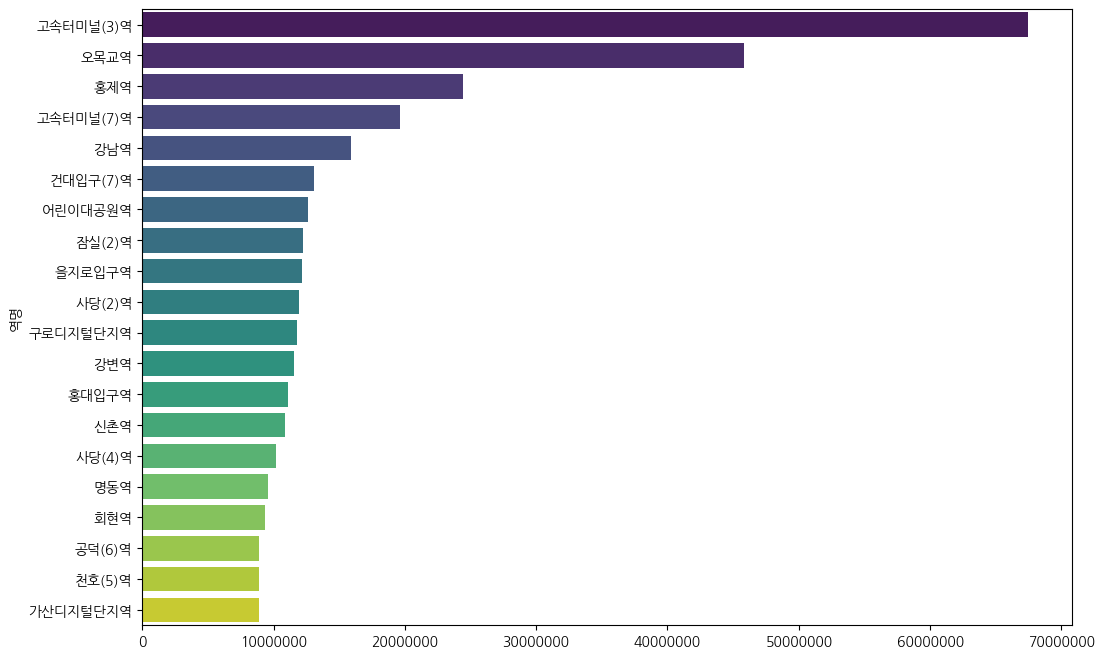

In [26]:
# 막대그래프 그리기
plt.figure(figsize=(12, 8))
sns.barplot(y=average_rent_per_station.index, x=average_rent_per_station.values, palette="viridis")
# 숫자 표기 형식 설정
plt.ticklabel_format(style='plain', axis='x')

417번의 상가가 크게 높기 때문에, 고속터미널역은 사실 비싸지 않을 수 있음.  
따라서 해당 역을 제거해봄

In [27]:
df.head()

,연번,상가유형,호선,역명,상가번호,면적(제곱미터),영업업종,계약시작일자,계약종료일자,월임대료,사업진행단계
416,417,복합,3호선,고속터미널(3)역,329-111,"7,475",패션잡화,2016-03-15,2026-11-09,"287,922,774",NaN
724,725,복합,5호선,오목교역,521-122,65,플라워,2023-07-03,2028-10-11,"86,110,000",NaN
1371,1372,복합,7호선,고속터미널(7)역,734-214,377,패션잡화,2023-04-10,2028-07-19,"84,900,600",NaN
133,134,복합,2호선,잠실(2)역,216-120,125,기타,2023-03-13,2028-08-10,"70,980,000",NaN
644,645,개별(대형),4호선,사당(4)역,433-239,871,기타,2019-11-15,2025-03-13,"61,517,300",NaN


In [ ]:
df_remove_outlier = df.drop(index=416)
df_remove_outlier.head()

역명
오목교역        45,843,500
홍제역         24,442,700
고속터미널(3)역   23,361,813
고속터미널(7)역   19,630,096
강남역         15,887,943
건대입구(7)역    13,104,444
어린이대공원역     12,632,620
잠실(2)역      12,268,475
을지로입구역      12,173,369
사당(2)역      11,922,303
구로디지털단지역    11,761,098
강변역         11,569,998
홍대입구역       11,078,998
신촌역         10,852,249
사당(4)역      10,157,747
명동역          9,605,672
회현역          9,326,000
공덕(6)역       8,909,842
천호(5)역       8,876,080
가산디지털단지역     8,852,030
Name: 월임대료, dtype: float64


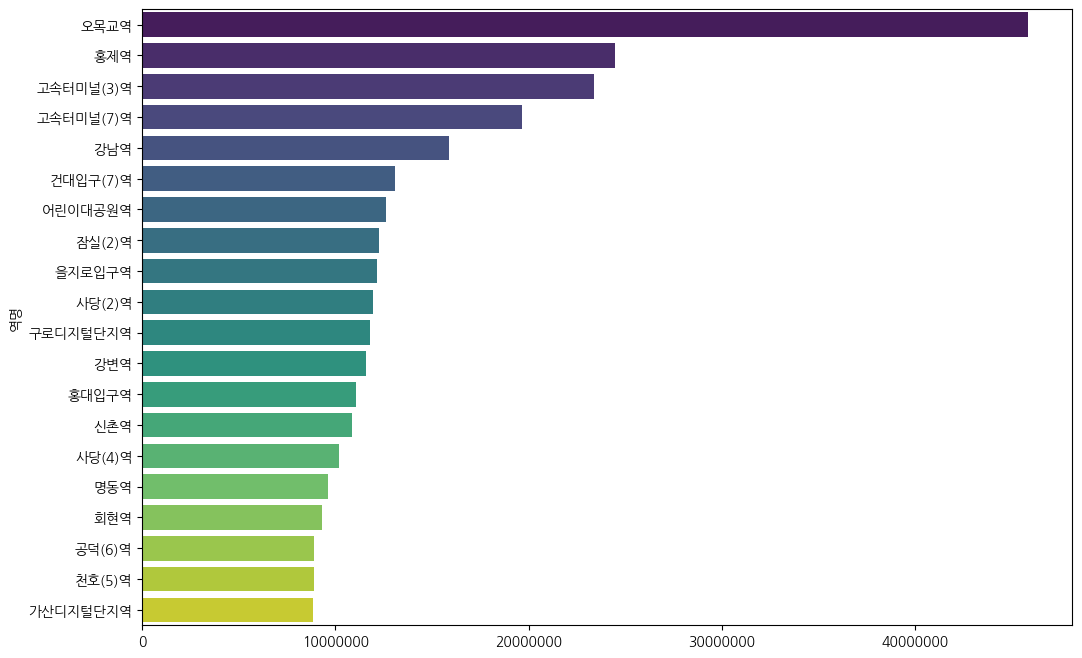

In [31]:
# 각 역마다의 월임대료 평균 계산 및 상위 20개 선택
average_rent_per_station = df_remove_outlier.groupby('역명')['월임대료'].mean().sort_values(ascending=False).head(20)
# print(average_rent_per_station)
# 막대그래프 그리기
plt.figure(figsize=(12, 8))
sns.barplot(y=average_rent_per_station.index, x=average_rent_per_station.values, palette="viridis")
# 숫자 표기 형식 설정
plt.ticklabel_format(style='plain', axis='x')

결론 오목교역이 제일 비싸다. 특정 건물로 인해 고터3가 제일 높음

### 어떠한 호선의 임대료가 제일 비싼가?

In [64]:
df_remove_outlier = df.drop(index=416)
df_remove_outlier.head()

,연번,상가유형,호선,역명,상가번호,면적(제곱미터),영업업종,계약시작일자,계약종료일자,월임대료,영업업종_encoded,일기준계약시작일자,일기준계약종료일자,계약기간
724,725,복합,5,오목교역,521-122,65,플라워,2023-07-03,2028-10-11,"86,110,000",9,2666,4593,1927
1371,1372,복합,7,고속터미널(7)역,734-214,377,패션잡화,2023-04-10,2028-07-19,"84,900,600",7,2582,4509,1927
133,134,복합,2,잠실(2)역,216-120,125,기타,2023-03-13,2028-08-10,"70,980,000",1,2554,4531,1977
644,645,개별(대형),4,사당(4)역,433-239,871,기타,2019-11-15,2025-03-13,"61,517,300",1,1340,3285,1945
1488,1489,복합,8,잠실(8)역,814-106,708,기타,2022-10-08,2026-04-10,"54,194,684",1,2398,3678,1280


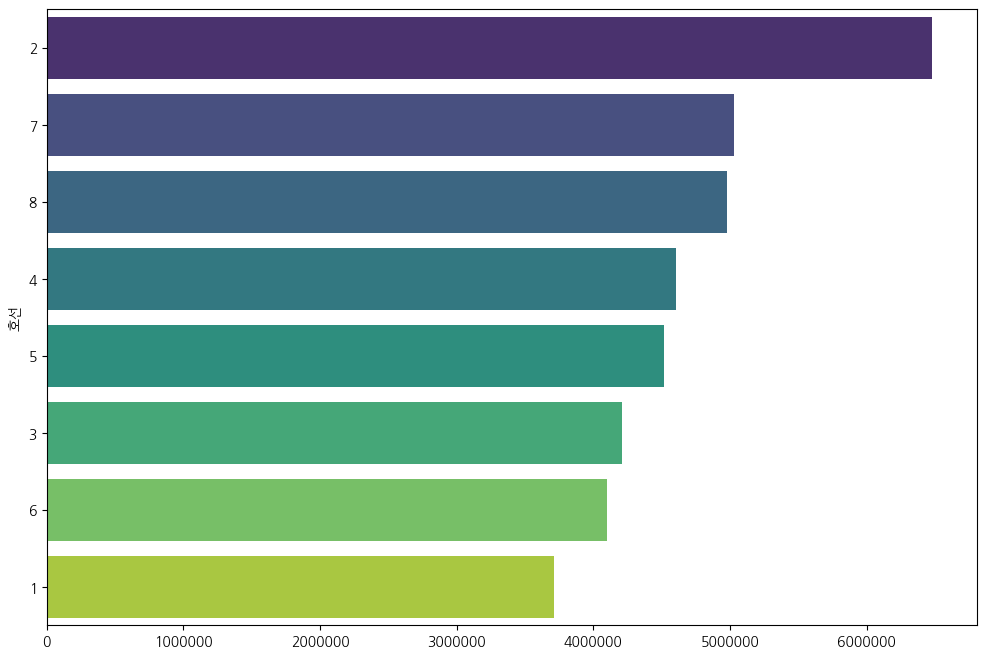

In [65]:
# 각 역마다의 월임대료 평균 계산 및 상위 20개 선택
average_rent_per_station = df_remove_outlier.groupby('호선')['월임대료'].mean().sort_values(ascending=False).head(20)
# print(average_rent_per_station)
# 막대그래프 그리기
plt.figure(figsize=(12, 8))
sns.barplot(y=average_rent_per_station.index, x=average_rent_per_station.values, palette="viridis")
# 숫자 표기 형식 설정
plt.ticklabel_format(style='plain', axis='x')

1호선라인의 임대료가 제일 저렴, 2호선이 제일 비쌈

### 면적 비례 임대료 확인

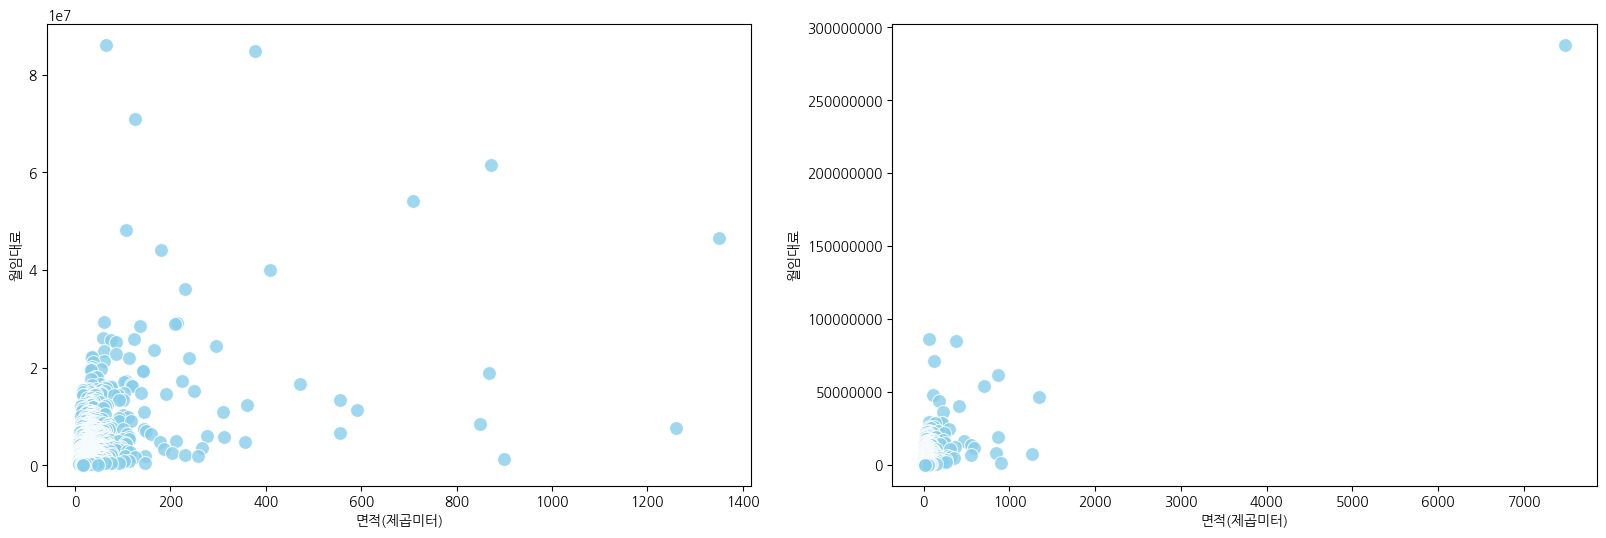

In [41]:
# Figure와 Axes 생성
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 6))

# Scatter plot 그리기
sns.scatterplot(ax=axes[0], x='면적(제곱미터)', y='월임대료', data=df_remove_outlier, s=100, color='skyblue', alpha=0.8)
plt.ticklabel_format(style='plain', axis='y')

# Scatter plot 그리기
sns.scatterplot(ax=axes[1], x='면적(제곱미터)', y='월임대료', data=df, s=100, color='skyblue', alpha=0.8)
plt.ticklabel_format(style='plain', axis='y')

## 업종 별 분석

In [44]:
df['영업업종'].value_counts()

영업업종
패션잡화     400
식음료      297
기타       190
편의점      174
플라워       79
화장품       66
의약업       48
사무실       29
무인프린트     23
밀키트       14
공유오피스      5
화상면접       3
Name: count, dtype: int64

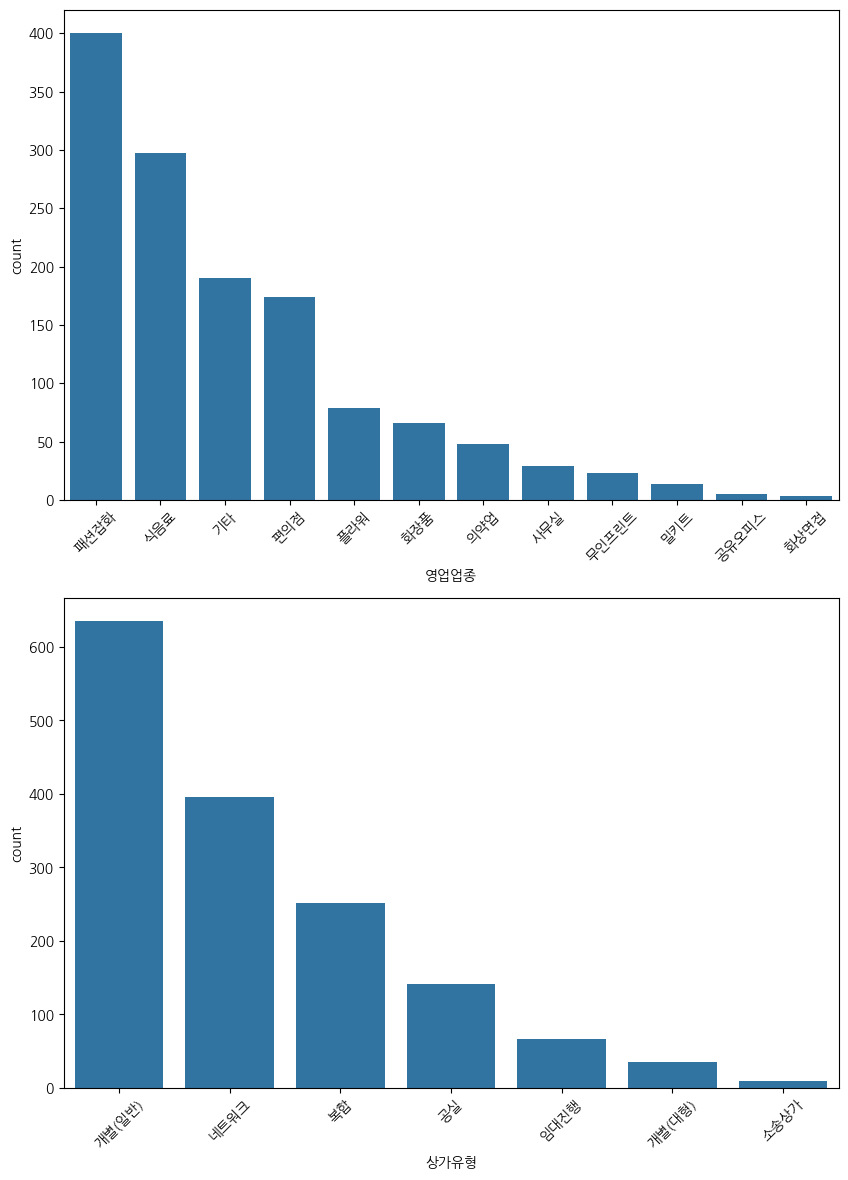

In [45]:
# - 복합: 일정면적 이상을 임차인의 비용으로 일괄 개발하여 직영 또는 위탁 운영하는 상가
# - 네트워크: 다수역에 다수점표를 일괄 임대차하여 운영하는 상가
# - 소송상가: 계약이 종료되었으나 명도거부하여 명도소송 중인 상가

plt.figure(figsize=(10,14))
plt.subplot(2,1,1)
sns.countplot(data=df, x='영업업종', order=df['영업업종'].value_counts().index)
plt.xticks(rotation=45)

plt.subplot(2,1,2)
sns.countplot(data=df, x='상가유형', order=df['상가유형'].value_counts().index)
plt.xticks(rotation=45)
plt.show()

### 각 호선 별 어떠한 상가유형이 많은지?

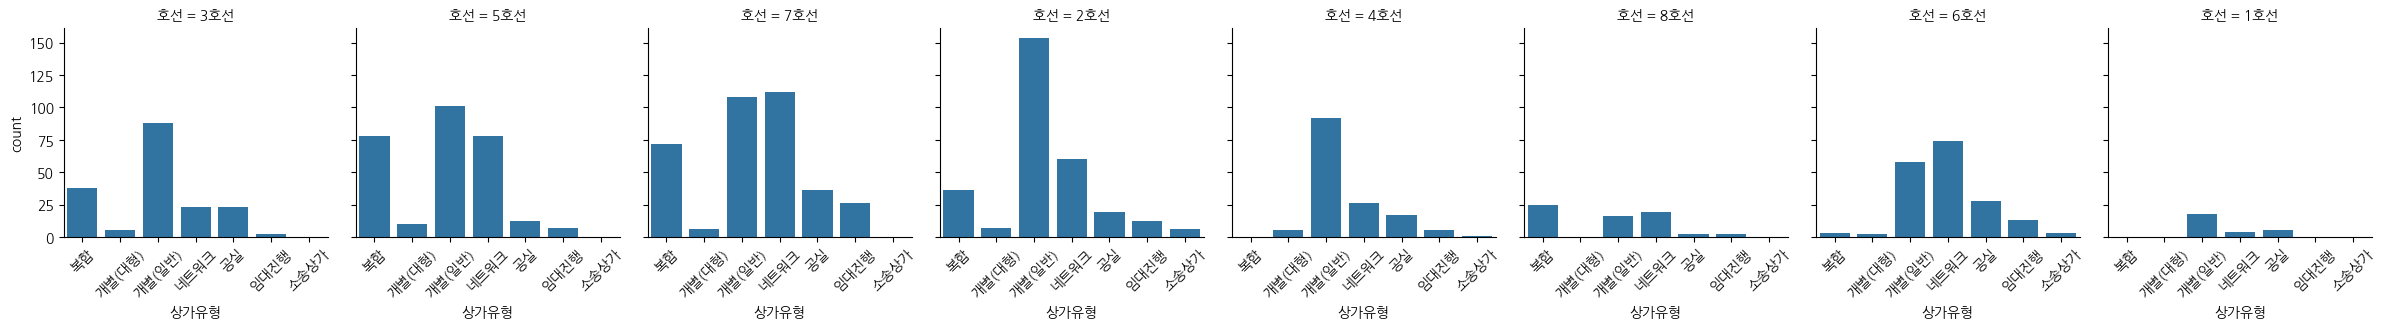

In [46]:
g = sns.FacetGrid(df, col="호선", height=3)
g.map(sns.countplot, "상가유형")
g.set_xticklabels(rotation=45)
plt.show()

- 각 호선별 업종의 분포 시각화

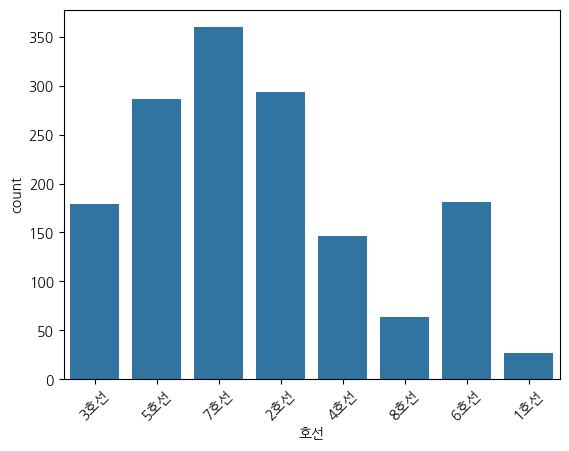

In [47]:
sns.countplot(data=df, x='호선')
plt.xticks(rotation=45)
plt.show()

### 각 호선 별 어떠한 업종이 많은지?

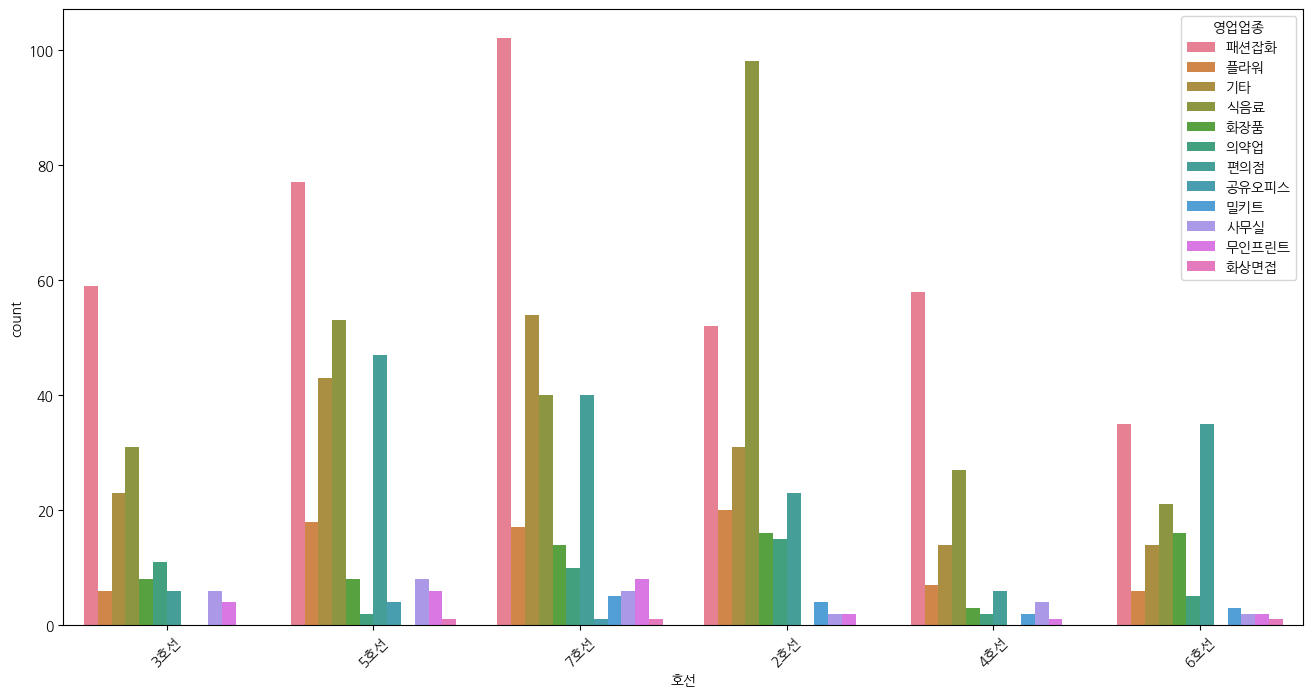

In [48]:
plt.figure(figsize=(16,8))
tmp = df.loc[~df['호선'].isin(['1호선', '8호선'])]
sns.countplot(data=tmp, x='호선', hue = '영업업종')
plt.xticks(rotation=45)
plt.show()

- 2,3,4,5,6,7 호선 중 유일하게 2호선만 **식음료** 업종이 많고 나머지는 패션잡화 업종이 제일 많음  
- **2호선에 배고프고 목마른 사람들이 많다**

### 영업업종과 면적, 월임대료와의 상관관계

In [49]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['영업업종_encoded'] = le.fit_transform(df['영업업종'])

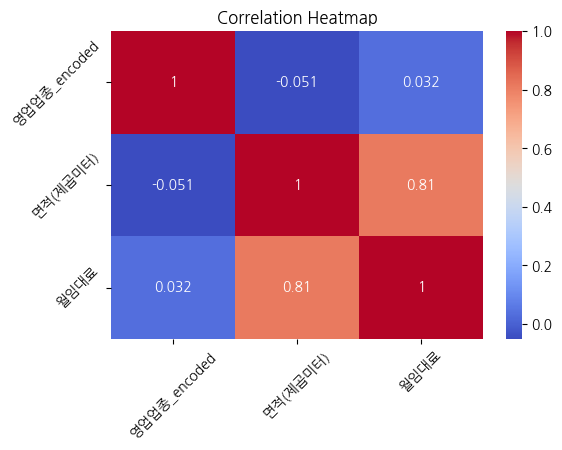

In [50]:
subset = df[['영업업종_encoded', '면적(제곱미터)','월임대료']]

# Calculate correlation matrix
corr_matrix = subset.corr()

# Plot heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.show()

## 호선별 계약기간

Original DataFrame:
        연번    상가유형 호선         역명     상가번호  면적(제곱미터)  영업업종     계약시작일자  \
416    417      복합  3  고속터미널(3)역  329-111     7,475  패션잡화 2016-03-15   
724    725      복합  5       오목교역  521-122        65   플라워 2023-07-03   
1371  1372      복합  7  고속터미널(7)역  734-214       377  패션잡화 2023-04-10   
133    134      복합  2     잠실(2)역  216-120       125    기타 2023-03-13   
644    645  개별(대형)  4     사당(4)역  433-239       871    기타 2019-11-15   
...    ...     ... ..        ...      ...       ...   ...        ...   
1236  1237  개별(일반)  7       사가정역  722-301        22   사무실 2019-05-21   
908    909    네트워크  5      굽은다리역  550-102        14    기타 2022-09-07   
605    606  개별(일반)  4     총신대입구역  432-108        16   사무실 2020-11-05   
1116  1117  개별(대형)  7       수락산역  711-102        47   사무실 2019-05-08   
382    383  개별(일반)  3      동대입구역  322-209        17    기타 2021-04-20   

         계약종료일자        월임대료  영업업종_encoded  일기준계약시작일자  일기준계약종료일자  계약기간  
416  2026-11-09 287,922,774             7  

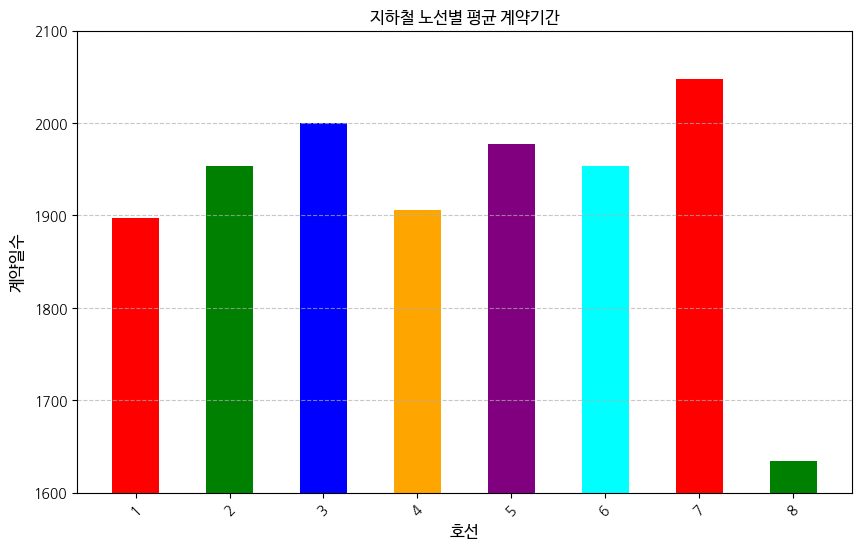

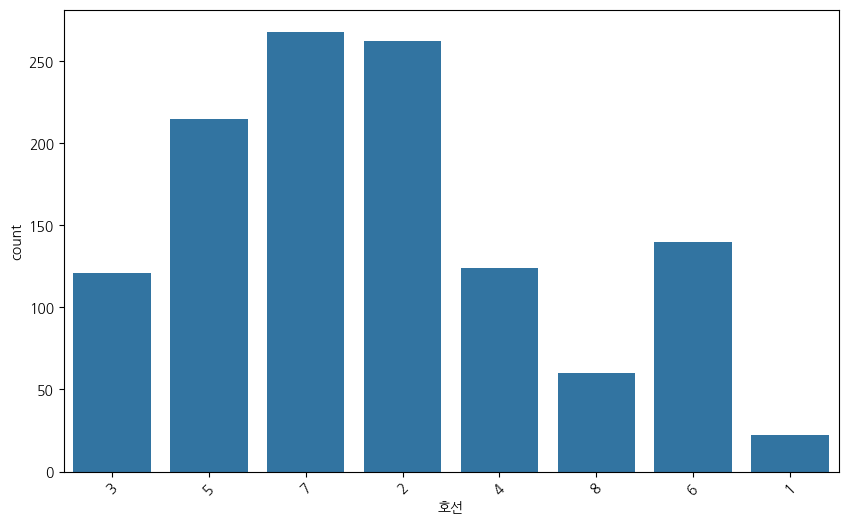

In [63]:
import pandas as pd

#결측치 많은 열 제거
# df = df.drop(columns=['사업진행단계'])

# 결측치 제거
df_cleaned = df.dropna()

df = df_cleaned

df['계약시작일자'] = pd.to_datetime(df['계약시작일자'])
df['계약종료일자'] = pd.to_datetime(df['계약종료일자'])

# 가장 이른 날짜 찾기
min_date = df['계약시작일자'].min()

# 가장 이른 날짜를 기준으로 일수 계산
df['일기준계약시작일자'] = (df['계약시작일자'] - min_date).dt.days
df['일기준계약종료일자'] = (df['계약종료일자'] - min_date).dt.days

df['계약기간'] = (df['계약종료일자'] - df['계약시작일자']).dt.days


# 결과 출력
print("Original DataFrame:")
print(df)

df['호선'] = df['호선'].str.replace('호선', '', regex=False)

average_per_category = df.groupby('호선')['계약기간'].mean().reset_index()

print("\nAverage Value per Category:")
print(average_per_category)

font_path='/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'

fontprop = fm.FontProperties(fname=font_path, size=12)

colors = ['red', 'green', 'blue', 'orange', 'purple', 'cyan']

# 막대그래프 그리기
plt.figure(figsize=(10, 6))
plt.bar(average_per_category['호선'], average_per_category['계약기간'], color=colors, width=0.5)
plt.xlabel('호선', fontproperties=fontprop)
plt.ylabel('계약일수', fontproperties=fontprop)
plt.title('지하철 노선별 평균 계약기간', fontproperties=fontprop)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# y축 범위 조정
plt.ylim(1600, 2100)  # y축 범위를 0에서 400으로 설정

plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='호선')
plt.xticks(rotation=45)
plt.show()


- 8호선은 50개 가량의 상가가 있는데 다 단기

# 결론

- 역 별로 7->2->5->6 순으로 상가의 수가 많음
- 2,3,4,5,6,7 호선 중 유일하게 2호선만 식음료 업종이 많고 나머지는 패션잡화 업종이 제일 많음
- 1호선라인의 임대료가 제일 저렴, 2호선이 제일 비쌈
- **2호선이 식음료를 소비하는 사람들이 제일 많은 것으로 분석 가능**  

  
- 가장 많은 업종은 패션잡화->식음료임  
- 가장 적은 업종은 화상면접  
- **업종과 임대료간의 상관관계는 무관하나, 면적과의 관계가 있음**   
  

- 8호선이 상가 계약 기간이 짧고, 7호선이 가장 길다.


  
추후, 어디에서 어떠한 장사를 하는 것을 하는 것이 유리한지, 분석 가능  
  -> 어떠한 곳이 임대료가 저렴한지  
  -> 어떠한 업종이 인기가 많은지  
  -> 상가 계약 기간을 고려